## How LLM impact the data driven Decision Making for Business

##Amazon Review Analysis & Classification

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

###Loading Dataset ...

In [ ]:
import datasets
from datasets import load_dataset

dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Electronics", trust_remote_code=True)
# print(dataset["full"][0])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/30.3k [00:00<?, ?B/s]

Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

Electronics.jsonl:   0%|          | 0.00/22.6G [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

Loading dataset shards:   0%|          | 0/34 [00:00<?, ?it/s]

In [ ]:
# Extracting data above and save it in csv

import pandas as pd



# Extract the first 110,000 rows
subset_dataset = dataset["full"][:110000]

# Convert the subset to a pandas DataFrame
df = pd.DataFrame(subset_dataset)

# Save the DataFrame to a CSV file
df.to_csv("amazon_reviews_110K.csv", index=False)


In [ ]:
import pandas as pd
dataset = pd.read_csv("amazon_reviews_100K.csv")

In [ ]:

# print(dataset[:500])
dataset

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,3.0,Smells like gasoline! Going back!,First & most offensive: they reek of gasoline ...,"[{'attachment_type': 'IMAGE', 'large_image_url...",B083NRGZMM,B083NRGZMM,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1658185117948,0,True
1,1.0,Didn’t work at all lenses loose/broken.,These didn’t work. Idk if they were damaged in...,[],B07N69T6TM,B07N69T6TM,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1592678549731,0,True
2,5.0,Excellent!,I love these. They even come with a carry case...,[],B01G8JO5F2,B01G8JO5F2,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1523093017534,0,True
3,5.0,Great laptop backpack!,I was searching for a sturdy backpack for scho...,[],B001OC5JKY,B001OC5JKY,AGGZ357AO26RQZVRLGU4D4N52DZQ,1290278495000,18,True
4,5.0,Best Headphones in the Fifties price range!,I've bought these headphones three times becau...,[],B013J7WUGC,B07CJYMRWM,AG2L7H23R5LLKDKLBEF2Q3L2MVDA,1676601581238,0,True
...,...,...,...,...,...,...,...,...,...,...
109995,3.0,que me gusto el producto,Todo bien estoy aprendiendo poco a poco.,[],B082X1HRV5,B08DPP3T9Z,AGSK4457CV47SOUWKE7LNLQKZ4ZA,1629312617073,0,True
109996,5.0,Works Great,Works better than firebox on my Samsung tv,[],B09BKCDXZC,B09W4XDQ9Q,AETDVAX7R2GWRHOHODZXL2UYGOUQ,1673731831946,0,True
109997,5.0,Works great.,Works as advertised.,[],B08C1W5N87,B08WJSHSLC,AETDVAX7R2GWRHOHODZXL2UYGOUQ,1644163911092,0,True
109998,5.0,Just right for the job!,Had a Dish 211K and a 1000.2 dish with DP LNBF...,[],B07NPX45TK,B07NPX45TK,AEHTSGGWKAKF33HQRXBHZZ3RQ4XA,1655315155717,0,True


In [ ]:
import pandas as pd

df = pd.DataFrame(dataset[:110000])

# df.to_csv('amazon_dataset_50k.csv', index=False)


In [ ]:


df_main = dataset[['rating', 'text']]
df_main


,rating,text
0,3.0,First & most offensive: they reek of gasoline ...
1,1.0,These didn’t work. Idk if they were damaged in...
2,5.0,I love these. They even come with a carry case...
3,5.0,I was searching for a sturdy backpack for scho...
4,5.0,I've bought these headphones three times becau...
...,...,...
109995,3.0,Todo bien estoy aprendiendo poco a poco.
109996,5.0,Works better than firebox on my Samsung tv
109997,5.0,Works as advertised.
109998,5.0,Had a Dish 211K and a 1000.2 dish with DP LNBF...


#Data cleaning and processing

In [ ]:

import datasets
from datasets import load_dataset
import pandas as pd
import re

df_main = df_main.dropna()

def clean_text(text):
    text = str(text)  # Ensure text should be string
    text = re.sub(r'[^\w\s]', '', text) # Remove special chars
    return text

df_main['text'] = df_main['text'].apply(clean_text)
# df_main['title'] = df_main['title'].apply(clean_text)

# Print the cleaned DataFrame
df_main


<ipython-input-7-851fdfc83feb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['text'] = df_main['text'].apply(clean_text)


,rating,text
0,3.0,First most offensive they reek of gasoline so...
1,1.0,These didnt work Idk if they were damaged in s...
2,5.0,I love these They even come with a carry case ...
3,5.0,I was searching for a sturdy backpack for scho...
4,5.0,Ive bought these headphones three times becaus...
...,...,...
109995,3.0,Todo bien estoy aprendiendo poco a poco
109996,5.0,Works better than firebox on my Samsung tv
109997,5.0,Works as advertised
109998,5.0,Had a Dish 211K and a 10002 dish with DP LNBF ...


In [ ]:


df_main.to_csv('amazon_reviews100k_cleaned.csv', index=False)


#Experiment 1: Working on 50, 100, 300, 500, 1000 Labelled Instances of 5000 Total Instances

In [ ]:
!pip install mvlearn

## 1.1 : TFIDF + Co-Training Semi Supervised Learning

In [ ]:
!pip install --upgrade numpy
!pip install --upgrade pandas matplotlib scikit-learn

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# Experiment 2: Working on the increased instances - 1000, 2000, 5000, 10000 Labelled Instances of 50000 Total Instances
________________________________________________________________________________

# TF-IDF + Semi Supervised Co-Training

In [ ]:
!pip install mvlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 54.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of seaborn to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 27.9 MB/s eta 0:00:00
  Created wheel for matplotlib: filename=matplotlib-3.3.4-cp311-cp311-linux_x86_64.whl size=11676262 sha256=3d64119296aea170fc76ccb3ac34b38cad740e50da7ae8b32c36af34288ef8f1
  Stored in directory: /root/.cache/pip/wheels/f5/4e/66/4bf0958840d0ff3311f8e597fef91ae567c88caca711278d5e
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstallin

#5000 Instances - Without Using GPU

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from mvlearn.semi_supervised import CTClassifier
from tabulate import tabulate
from tqdm import tqdm

# Step 1: Load and clean data
df = pd.read_csv("/content/amazon_reviews100k_cleaned.csv").dropna(subset=["text", "rating"])
df["binary_rating"] = (df["rating"] >= 4).astype(int)
print("Dataset Loaded")
# Step 2: Sample 5000 for subset
print("Sampling 5000 instances...")
df_subset = df.sample(n=5000, random_state=42).reset_index(drop=True)
X = df_subset["text"]
y = df_subset["binary_rating"]
X_train_raw, X_test_raw, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: TF-IDF transformation
print("Vectorizing text with TF-IDF...")
tfidf = TfidfVectorizer(max_features=10000)
X_train_vec = tfidf.fit_transform(X_train_raw).toarray()
X_test_vec = tfidf.transform(X_test_raw).toarray()

# Step 4: Co-training evaluation loop
label_sizes = [50, 100, 300, 500, 1000]

results = []

print("Starting semi-supervised training using CTClassifier...\n")

for size in tqdm(label_sizes, desc="Training", unit="run"):
    start_train = time.time()

    y_partial = y_train_full.reset_index(drop=True).copy()
    y_partial[size:] = np.nan
    y_partial = y_partial.to_numpy()

    clf1 = RandomForestClassifier(n_estimators=50, random_state=1)
    clf2 = SVC(probability=True, kernel='linear', random_state=1)
    model = CTClassifier(clf1, clf2, random_state=1)


    model.fit([X_train_vec, X_train_vec], y_partial)
    end_train_time = time.time() - start_train

    # start_test = time.time()
    y_pred = model.predict([X_test_vec, X_test_vec])
    test_time = time.time() - end_train_time

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

    results.append([size, f"{acc:.4f}", f"{f1:.4f}", f"{train_time:.2f}s", f"{test_time:.2f}s"])

# Step 5: Print results
print("\nTraining completed.\n")
print("\n TFIDF + Co-Training SSL")
print(tabulate(results, headers=["# Labeled", "Accuracy", "F1-Score", "Train Time", "Test Time"], tablefmt="grid"))


Dataset Loaded
Vectorizing text with TF-IDF...
Starting semi-supervised training using CTClassifier...



Training: 100%|██████████| 5/5 [1:03:34<00:00, 762.95s/run] 


Training complete.

+-------------+------------+------------+--------------+-------------+
|   # Labeled |   Accuracy |   F1-Score | Train Time   | Test Time   |
+=============+============+============+==============+=============+
|          50 |      0.811 |     0.7264 | 142.29s      | 1.02s       |
+-------------+------------+------------+--------------+-------------+
|         100 |      0.799 |     0.7379 | 275.21s      | 2.77s       |
+-------------+------------+------------+--------------+-------------+
|         300 |      0.84  |     0.813  | 481.36s      | 3.63s       |
+-------------+------------+------------+--------------+-------------+
|         500 |      0.844 |     0.8071 | 829.59s      | 4.67s       |
+-------------+------------+------------+--------------+-------------+
|        1000 |      0.863 |     0.8432 | 2067.36s     | 6.83s       |
+-------------+------------+------------+--------------+-------------+


# 5000 Instances - Without Using GPU ...

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from mvlearn.semi_supervised import CTClassifier
from tabulate import tabulate
from tqdm import tqdm

# Step 1: Load and clean data
df = pd.read_csv("/content/amazon_reviews100k_cleaned.csv").dropna(subset=["text", "rating"])
df["binary_rating"] = (df["rating"] >= 4).astype(int)
print("Dataset Loaded")
# Step 2: Sample 5000 for subset
print("Sampling 5000 instances...")
df_subset = df.sample(n=5000, random_state=42).reset_index(drop=True)
X = df_subset["text"]
y = df_subset["binary_rating"]
X_train_raw, X_test_raw, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: TF-IDF transformation
print("Vectorizing text with TF-IDF...")
tfidf = TfidfVectorizer(max_features=10000)
X_train_vec = tfidf.fit_transform(X_train_raw).toarray()
X_test_vec = tfidf.transform(X_test_raw).toarray()

# Step 4: Co-training evaluation loop
label_sizes = [50, 100, 300, 500, 1000]

results = []

print("Starting semi-supervised training using CTClassifier...\n")

for size in tqdm(label_sizes, desc="Training", unit="run"):
    start_train = time.time()

    y_partial = y_train_full.reset_index(drop=True).copy()
    y_partial[size:] = np.nan
    y_partial = y_partial.to_numpy()

    clf1 = RandomForestClassifier(n_estimators=50, random_state=1)
    clf2 = SVC(probability=True, kernel='linear', random_state=1) # Linear ~ Flexible to handle in scalling large number of samples
    model = CTClassifier(clf1, clf2, random_state=1)


    model.fit([X_train_vec, X_train_vec], y_partial)
    end_train_time = time.time() - start_train # calc train time

    start_test = time.time()
    y_pred = model.predict([X_test_vec, X_test_vec])


    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    test_time = time.time() - start_test # calc test time
    results.append([size, f"{acc:.4f}", f"{f1:.4f}", f"{end_train_time:.2f}s", f"{test_time:.2f}s"])

# Step 5: Print results
print("\nTraining completed.\n")
print("\n Test Completed..\n")
print("\n TFIDF + Co-Training SSL")
print(tabulate(results, headers=["# Labeled", "Accuracy", "F1-Score", "Train Time", "Test Time"], tablefmt="grid"))


Dataset Loaded
Sampling 5000 instances...
Vectorizing text with TF-IDF...
Starting semi-supervised training using CTClassifier...



Training: 100%|██████████| 5/5 [42:35<00:00, 511.20s/run]


Training completed.


 Test Completed..


 TFIDF + Co-Training SSL
+-------------+------------+------------+--------------+-------------+
|   # Labeled |   Accuracy |   F1-Score | Train Time   | Test Time   |
+=============+============+============+==============+=============+
|          50 |      0.811 |     0.7264 | 77.19s       | 0.66s       |
+-------------+------------+------------+--------------+-------------+
|         100 |      0.799 |     0.7379 | 172.46s      | 1.54s       |
+-------------+------------+------------+--------------+-------------+
|         300 |      0.84  |     0.813  | 277.69s      | 2.18s       |
+-------------+------------+------------+--------------+-------------+
|         500 |      0.844 |     0.8071 | 522.57s      | 2.64s       |
+-------------+------------+------------+--------------+-------------+
|        1000 |      0.863 |     0.8432 | 1493.75s     | 5.31s       |
+-------------+------------+------------+--------------+-------------+


# 10000 Instances - Without GPU

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from mvlearn.semi_supervised import CTClassifier
from tabulate import tabulate
from tqdm import tqdm

# Step 1: Load and clean data
print("Loading Dataset ...")
df = pd.read_csv("/content/amazon_reviews100k_cleaned.csv").dropna(subset=["text", "rating"])
df["binary_rating"] = (df["rating"] >= 4).astype(int)
print("Dataset Loaded")

print("Sampling 10000 instances...")
df_subset = df.sample(n=10000, random_state=42).reset_index(drop=True)
X = df_subset["text"]
y = df_subset["binary_rating"]
X_train_raw, X_test_raw, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: TF-IDF transformation
print("Vectorizing text with TF-IDF...")
tfidf = TfidfVectorizer(max_features=15000)
X_train_vec = tfidf.fit_transform(X_train_raw).toarray()
X_test_vec = tfidf.transform(X_test_raw).toarray()

# Step 4: Co-training evaluation loop
label_sizes = [50, 100, 300, 500, 1000]

results = []

print("Starting semi-supervised training using CTClassifier...\n")

for size in tqdm(label_sizes, desc="Training", unit="run"):
    start_train = time.time()

    y_partial = y_train_full.reset_index(drop=True).copy()
    y_partial[size:] = np.nan
    y_partial = y_partial.to_numpy()

    clf1 = RandomForestClassifier(n_estimators=50, random_state=1)
    clf2 = SVC(probability=True, kernel='linear', random_state=1) # Linear ~ Flexible to handle in scalling large number of samples
    model = CTClassifier(clf1, clf2, random_state=1)


    model.fit([X_train_vec, X_train_vec], y_partial)
    end_train_time = time.time() - start_train # calc train time

    start_test = time.time()
    y_pred = model.predict([X_test_vec, X_test_vec])


    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    test_time = time.time() - start_test # calc test time
    results.append([size, f"{acc:.4f}", f"{f1:.4f}", f"{end_train_time:.2f}s", f"{test_time:.2f}s"])

# Step 5: Print results
print("\nTraining completed.\n")
print("\n Test Completed..\n")
print("\n TFIDF + Co-Training SSL")
print(tabulate(results, headers=["# Labeled", "Accuracy", "F1-Score", "Train Time", "Test Time"], tablefmt="grid"))


Loading Dataset ...
Dataset Loaded
Sampling 10000 instances...
Vectorizing text with TF-IDF...
Starting semi-supervised training using CTClassifier...



Training: 100%|██████████| 5/5 [1:14:10<00:00, 890.14s/run] 


Training completed.


 Test Completed..


 TFIDF + Co-Training SSL
+-------------+------------+------------+--------------+-------------+
|   # Labeled |   Accuracy |   F1-Score | Train Time   | Test Time   |
+=============+============+============+==============+=============+
|          50 |     0.786  |     0.7528 | 124.07s      | 3.26s       |
+-------------+------------+------------+--------------+-------------+
|         100 |     0.7995 |     0.7677 | 168.43s      | 6.59s       |
+-------------+------------+------------+--------------+-------------+
|         300 |     0.829  |     0.8032 | 476.34s      | 7.38s       |
+-------------+------------+------------+--------------+-------------+
|         500 |     0.833  |     0.8012 | 915.82s      | 11.97s      |
+-------------+------------+------------+--------------+-------------+
|        1000 |     0.8515 |     0.8187 | 2718.43s     | 18.38s      |
+-------------+------------+------------+--------------+-------------+


# 15000 Instances - Without GPU

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from mvlearn.semi_supervised import CTClassifier
from tabulate import tabulate
from tqdm import tqdm

# Step 1: Load and clean data
print("Loading Dataset ...")
df = pd.read_csv("/content/amazon_reviews100k_cleaned.csv").dropna(subset=["text", "rating"])
df["binary_rating"] = (df["rating"] >= 4).astype(int)
print("Dataset Loaded")

print("Sampling 150000 instances...")
df_subset = df.sample(n=15000, random_state=42).reset_index(drop=True)
X = df_subset["text"]
y = df_subset["binary_rating"]
X_train_raw, X_test_raw, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: TF-IDF transformation
print("Vectorizing text with TF-IDF...")
tfidf = TfidfVectorizer(max_features=10000)
X_train_vec = tfidf.fit_transform(X_train_raw).toarray()
X_test_vec = tfidf.transform(X_test_raw).toarray()

# Step 4: Co-training evaluation loop
label_sizes = [50, 100, 300, 500, 1000]

results = []

print("Starting semi-supervised training using CTClassifier...\n")

for size in tqdm(label_sizes, desc="Training", unit="run"):
    start_train = time.time()

    y_partial = y_train_full.reset_index(drop=True).copy()
    y_partial[size:] = np.nan
    y_partial = y_partial.to_numpy()

    clf1 = RandomForestClassifier(n_estimators=50, random_state=1)
    clf2 = SVC(probability=True, kernel='linear', random_state=1) # Linear ~ Flexible to handle in scalling large number of samples
    model = CTClassifier(clf1, clf2, random_state=1)


    model.fit([X_train_vec, X_train_vec], y_partial)
    end_train_time = time.time() - start_train # calc train time

    start_test = time.time()
    y_pred = model.predict([X_test_vec, X_test_vec])


    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    test_time = time.time() - start_test # calc test time
    results.append([size, f"{acc:.4f}", f"{f1:.4f}", f"{end_train_time:.2f}s", f"{test_time:.2f}s"])

# Step 5: Print results
print("\nTraining completed.\n")
print("\n Test Completed..\n")
print("\n TFIDF + Co-Training SSL")
print(tabulate(results, headers=["# Labeled", "Accuracy", "F1-Score", "Train Time", "Test Time"], tablefmt="grid"))


Loading Dataset ...
Dataset Loaded
Sampling 150000 instances...
Vectorizing text with TF-IDF...
Starting semi-supervised training using CTClassifier...



Training: 100%|██████████| 5/5 [41:04<00:00, 492.98s/run]


Training completed.


 Test Completed..


 TFIDF + Co-Training SSL
+-------------+------------+------------+--------------+-------------+
|   # Labeled |   Accuracy |   F1-Score | Train Time   | Test Time   |
+=============+============+============+==============+=============+
|          50 |     0.8087 |     0.7231 | 78.29s       | 1.71s       |
+-------------+------------+------------+--------------+-------------+
|         100 |     0.7843 |     0.7322 | 104.66s      | 3.85s       |
+-------------+------------+------------+--------------+-------------+
|         300 |     0.8153 |     0.7532 | 303.62s      | 5.34s       |
+-------------+------------+------------+--------------+-------------+
|         500 |     0.8227 |     0.7602 | 516.31s      | 6.91s       |
+-------------+------------+------------+--------------+-------------+
|        1000 |     0.8393 |     0.8003 | 1430.41s     | 13.79s      |
+-------------+------------+------------+--------------+-------------+


# 15000 Instances/feature - Without Using GPU

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from mvlearn.semi_supervised import CTClassifier
from tabulate import tabulate
from tqdm import tqdm

# Step 1: Load and clean data
print("Loading Dataset ...")
df = pd.read_csv("/content/amazon_reviews100k_cleaned.csv").dropna(subset=["text", "rating"])
df["binary_rating"] = (df["rating"] >= 4).astype(int)
print("Dataset Loaded")

print("Sampling 10000 instances...")
df_subset = df.sample(n=10000, random_state=42).reset_index(drop=True)
X = df_subset["text"]
y = df_subset["binary_rating"]
X_train_raw, X_test_raw, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: TF-IDF transformation
print("Vectorizing text with TF-IDF...")
tfidf = TfidfVectorizer(max_features=15000)
X_train_vec = tfidf.fit_transform(X_train_raw).toarray()
X_test_vec = tfidf.transform(X_test_raw).toarray()

# Step 4: Co-training evaluation loop
label_sizes = [50, 100, 300, 500, 1000]

results = []

print("Starting semi-supervised training using CTClassifier...\n")

for size in tqdm(label_sizes, desc="Training", unit="run"):
    start_train = time.time()

    y_partial = y_train_full.reset_index(drop=True).copy()
    y_partial[size:] = np.nan
    y_partial = y_partial.to_numpy()

    clf1 = RandomForestClassifier(n_estimators=50, random_state=1)
    clf2 = SVC(probability=True, kernel='linear', random_state=1) # Linear ~ Flexible to handle in scalling large number of samples
    model = CTClassifier(clf1, clf2, random_state=1)


    model.fit([X_train_vec, X_train_vec], y_partial)
    end_train_time = time.time() - start_train # calc train time

    start_test = time.time()
    y_pred = model.predict([X_test_vec, X_test_vec])


    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    test_time = time.time() - start_test # calc test time
    results.append([size, f"{acc:.4f}", f"{f1:.4f}", f"{end_train_time:.2f}s", f"{test_time:.2f}s"])

# Step 5: Print results
print("\nTraining completed.\n")
print("\n Test Completed..\n")
print("\n TFIDF + Co-Training SSL")
print(tabulate(results, headers=["# Labeled", "Accuracy", "F1-Score", "Train Time", "Test Time"], tablefmt="grid"))


Loading Dataset ...
Dataset Loaded
Sampling 10000 instances...
Vectorizing text with TF-IDF...
Starting semi-supervised training using CTClassifier...



Training: 100%|██████████| 5/5 [1:16:43<00:00, 920.61s/run] 


Training completed.


 Test Completed..


 TFIDF + Co-Training SSL
+-------------+------------+------------+--------------+-------------+
|   # Labeled |   Accuracy |   F1-Score | Train Time   | Test Time   |
+=============+============+============+==============+=============+
|          50 |     0.786  |     0.7528 | 125.82s      | 3.28s       |
+-------------+------------+------------+--------------+-------------+
|         100 |     0.7995 |     0.7677 | 168.03s      | 6.34s       |
+-------------+------------+------------+--------------+-------------+
|         300 |     0.829  |     0.8032 | 477.36s      | 9.26s       |
+-------------+------------+------------+--------------+-------------+
|         500 |     0.833  |     0.8012 | 876.68s      | 11.25s      |
+-------------+------------+------------+--------------+-------------+
|        1000 |     0.8515 |     0.8187 | 2909.09s     | 15.92s      |
+-------------+------------+------------+--------------+-------------+


## 1.2: BLAIR + NN

# 5,000 Instances - with GPU

In [ ]:
from huggingface_hub import login
login("HF_Token")

In [ ]:
#Step 1: Import libraries
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from transformers import AutoTokenizer, AutoModel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm

#Step 2: Upload and load data

df = pd.read_csv("amazon_reviews100k_cleaned.csv").dropna(subset=["text", "rating"])
df["binary_rating"] = (df["rating"] >= 4).astype(int)

# Step 3: Sample + split dataset
df = df.sample(n=5000, random_state=42).reset_index(drop=True)
X_train_texts, X_test_texts, y_train_full, y_test = train_test_split(
    df["text"], df["binary_rating"], test_size=0.2, stratify=df["binary_rating"], random_state=42
)

# STEP 4: Load BLAiR Tokenizer and Model
tokenizer = AutoTokenizer.from_pretrained("hyp1231/blair-roberta-base")
model = AutoModel.from_pretrained("hyp1231/blair-roberta-base")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# STEP 5: Define Embedding Function
def embed_blair(texts, batch_size=32):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        inputs = tokenizer(
            texts[i:i+batch_size],
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=128
        ).to(device)
        with torch.no_grad():
            outputs = model(**inputs)
        cls_embed = outputs.last_hidden_state[:, 0, :].detach().cpu().numpy()
        embeddings.extend(cls_embed)
    return np.array(embeddings)


#Step 6: Build neural net
def build_nn(input_dim):
    model = Sequential([
        Dense(256, activation="relu", input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(128, activation="relu"),
        Dropout(0.2),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
    return model

#Step 8: Precompute test embeddings
print("Embedding test set...")
X_test_embed = embed_blair(X_test_texts.tolist())


# STEP 9: Train and Evaluate Across Labeled Sizes
label_sizes = [50, 100, 300, 500, 1000]
results_with_time = []

for size in tqdm(label_sizes, desc="Training", unit="run"):
    # Prepare labeled data
    X_labeled = X_train_texts.iloc[:size].tolist()
    y_labeled = y_train_full.iloc[:size].to_numpy()

    # Embedding + Training Time
    start_embed = time.time()
    X_train_embed = embed_blair(X_labeled)
    end_embed = time.time()

    model_nn = build_nn(X_train_embed.shape[1])

    start_train = time.time()
    model_nn.fit(X_train_embed, y_labeled, epochs=5, batch_size=16, verbose=0)
    end_train = time.time()

    # Testing Time
    start_test = time.time()
    y_pred = (model_nn.predict(X_test_embed) > 0.5).astype(int)
    end_test = time.time()

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

    results_with_time.append([
        size,
        round(acc, 4),
        round(f1, 4),
        f"{end_train - start_train:.2f}s",
        f"{end_test - start_test:.2f}s"
    ])

# STEP 10: Display Tabulated Results
print("\n Training Complete\n")
print("\n Test Completed..\n")
print("\n BLAIR + Neural Network")
print(tabulate(results_with_time, headers=["# Labeled", "Accuracy", "F1-Score", "Train Time", "Test Time"], tablefmt="grid"))


Embedding test set...


Training:   0%|          | 0/5 [00:00<?, ?run/s]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


Training:  20%|██        | 1/5 [00:04<00:19,  4.76s/run]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


Training:  40%|████      | 2/5 [00:10<00:15,  5.15s/run]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Training:  60%|██████    | 3/5 [00:16<00:11,  5.72s/run]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


Training:  80%|████████  | 4/5 [00:24<00:06,  6.60s/run]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


Training: 100%|██████████| 5/5 [00:36<00:00,  7.27s/run]


 Training Complete


 Test Completed..


 BLAIR + Neural Network
+-------------+------------+------------+--------------+-------------+
|   # Labeled |   Accuracy |   F1-Score | Train Time   | Test Time   |
+=============+============+============+==============+=============+
|          50 |      0.791 |     0.7422 | 3.76s        | 0.68s       |
+-------------+------------+------------+--------------+-------------+
|         100 |      0.802 |     0.754  | 4.39s        | 0.38s       |
+-------------+------------+------------+--------------+-------------+
|         300 |      0.806 |     0.7979 | 3.96s        | 0.68s       |
+-------------+------------+------------+--------------+-------------+
|         500 |      0.825 |     0.8214 | 4.42s        | 0.68s       |
+-------------+------------+------------+--------------+-------------+
|        1000 |      0.851 |     0.8442 | 5.50s        | 0.68s       |
+-------------+------------+------------+--------------+-------------+


# 10,000 Instances - With GPU

In [ ]:
#Step 1: Import libraries
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from transformers import AutoTokenizer, AutoModel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
from tabulate import tabulate
import time

#Step 2: Upload and load data
print("Loading Dataset ...")
df = pd.read_csv("amazon_reviews100k_cleaned.csv").dropna(subset=["text", "rating"])
df["binary_rating"] = (df["rating"] >= 4).astype(int)
print("Dataset Loaded")

# Step 3: Sample + split dataset
print("\n 10000 Instances...")
df = df.sample(n=10000, random_state=42).reset_index(drop=True)
X_train_texts, X_test_texts, y_train_full, y_test = train_test_split(
    df["text"], df["binary_rating"], test_size=0.2, stratify=df["binary_rating"], random_state=42
)

# STEP 4: Load BLAiR Tokenizer and Model
tokenizer = AutoTokenizer.from_pretrained("hyp1231/blair-roberta-base")
model = AutoModel.from_pretrained("hyp1231/blair-roberta-base")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("\n Embedding BLAIR")
# STEP 5: Define Embedding Function
def embed_blair(texts, batch_size=32):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        inputs = tokenizer(
            texts[i:i+batch_size],
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=128
        ).to(device)
        with torch.no_grad():
            outputs = model(**inputs)
        cls_embed = outputs.last_hidden_state[:, 0, :].detach().cpu().numpy()
        embeddings.extend(cls_embed)
    return np.array(embeddings)


#Step 6: Build neural net
def build_nn(input_dim):
    model = Sequential([
        Dense(256, activation="relu", input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(128, activation="relu"),
        Dropout(0.2),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
    return model

#Step 8: Precompute test embeddings
print("Embedding test set...")
X_test_embed = embed_blair(X_test_texts.tolist())


# STEP 9: Train and Evaluate Across Labeled Sizes
label_sizes = [50, 100, 300, 500, 1000]
results_with_time = []

for size in tqdm(label_sizes, desc="Training", unit="run"):
    # Prepare labeled data
    X_labeled = X_train_texts.iloc[:size].tolist()
    y_labeled = y_train_full.iloc[:size].to_numpy()

    # Embedding + Training Time
    start_embed = time.time()
    X_train_embed = embed_blair(X_labeled)
    end_embed = time.time()

    model_nn = build_nn(X_train_embed.shape[1])

    start_train = time.time()
    model_nn.fit(X_train_embed, y_labeled, epochs=5, batch_size=16, verbose=0)
    end_train = time.time()

    # Testing Time
    start_test = time.time()
    y_pred = (model_nn.predict(X_test_embed) > 0.5).astype(int)
    end_test = time.time()

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

    results_with_time.append([
        size,
        round(acc, 4),
        round(f1, 4),
        f"{end_train - start_train:.2f}s",
        f"{end_test - start_test:.2f}s"
    ])

# STEP 10: Display Tabulated Results
print("\n Training completed.\n")
print("\n Test Completed..\n")
print("\n BLAIR + Neural Network")
print(tabulate(results_with_time, headers=["# Labeled", "Accuracy", "F1-Score", "Train Time", "Test Time"], tablefmt="grid"))


Loading Dataset ...
Dataset Loaded

 10000 Instances...

 Embedding BLAIR
Embedding test set...


Training:   0%|          | 0/5 [00:00<?, ?run/s]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


Training:  20%|██        | 1/5 [00:08<00:35,  8.98s/run]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Training:  40%|████      | 2/5 [00:14<00:20,  6.98s/run]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


Training:  60%|██████    | 3/5 [00:21<00:13,  6.90s/run]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Training:  80%|████████  | 4/5 [00:28<00:07,  7.14s/run]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Training: 100%|██████████| 5/5 [00:39<00:00,  7.87s/run]


 Training completed.


 Test Completed..


 BLAIR + Neural Network
+-------------+------------+------------+--------------+-------------+
|   # Labeled |   Accuracy |   F1-Score | Train Time   | Test Time   |
+=============+============+============+==============+=============+
|          50 |     0.774  |     0.7353 | 7.95s        | 0.63s       |
+-------------+------------+------------+--------------+-------------+
|         100 |     0.8005 |     0.7647 | 3.55s        | 1.32s       |
+-------------+------------+------------+--------------+-------------+
|         300 |     0.8135 |     0.8046 | 4.30s        | 0.71s       |
+-------------+------------+------------+--------------+-------------+
|         500 |     0.815  |     0.7917 | 4.20s        | 0.42s       |
+-------------+------------+------------+--------------+-------------+
|        1000 |     0.8235 |     0.8112 | 4.38s        | 0.41s       |
+-------------+------------+------------+--------------+-------------+


_______________________________________________________________________
#50,000 - With GPU

In [ ]:
#Step 1: Import libraries
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from transformers import AutoTokenizer, AutoModel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
from tabulate import tabulate
import time

#Step 2: Upload and load data
print("Loading Dataset ...")
df = pd.read_csv("amazon_reviews100k_cleaned.csv").dropna(subset=["text", "rating"])
df["binary_rating"] = (df["rating"] >= 4).astype(int)
print("Dataset Loaded")

# Step 3: Sample + split dataset
print("\n50000 Instances...")
df = df.sample(n=50000, random_state=42).reset_index(drop=True)
X_train_texts, X_test_texts, y_train_full, y_test = train_test_split(
    df["text"], df["binary_rating"], test_size=0.2, stratify=df["binary_rating"], random_state=42
)

# STEP 4: Load BLAiR Tokenizer and Model
tokenizer = AutoTokenizer.from_pretrained("hyp1231/blair-roberta-base")
model = AutoModel.from_pretrained("hyp1231/blair-roberta-base")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("\nEmbedding BLAIR")
# STEP 5: Define Embedding Function
def embed_blair(texts, batch_size=32):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        inputs = tokenizer(
            texts[i:i+batch_size],
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=128
        ).to(device)
        with torch.no_grad():
            outputs = model(**inputs)
        cls_embed = outputs.last_hidden_state[:, 0, :].detach().cpu().numpy()
        embeddings.extend(cls_embed)
    return np.array(embeddings)


#Step 6: Build neural net
def build_nn(input_dim):
    model = Sequential([
        Dense(256, activation="relu", input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(128, activation="relu"),
        Dropout(0.2),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
    return model

#Step 8: Precompute test embeddings
print("Embedding test set...")
X_test_embed = embed_blair(X_test_texts.tolist())


# STEP 9: Train and Evaluate Across Labeled Sizes
label_sizes = [50, 100, 300, 500, 1000]
results_with_time = []
print("\n Training Started ..")
for size in tqdm(label_sizes, desc="Training", unit = "run"):
    # Prepare labeled data
    X_labeled = X_train_texts.iloc[:size].tolist()
    y_labeled = y_train_full.iloc[:size].to_numpy()

    # Embedding + Training Time
    start_embed = time.time()
    X_train_embed = embed_blair(X_labeled)
    end_embed = time.time()

    model_nn = build_nn(X_train_embed.shape[1])

    start_train = time.time()
    model_nn.fit(X_train_embed, y_labeled, epochs=5, batch_size=16, verbose=0)
    end_train = time.time()

    # Testing Time
    start_test = time.time()
    y_pred = (model_nn.predict(X_test_embed) > 0.5).astype(int)
    end_test = time.time()

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

    results_with_time.append([
        size,
        round(acc, 4),
        round(f1, 4),
        f"{end_train - start_train:.2f}s",
        f"{end_test - start_test:.2f}s"
    ])

# STEP 10: Display Tabulated Results
print("\n Training completed.")
print("\n Test Completed..")
print("\n BLAIR + Neural Network")
print(tabulate(results_with_time, headers=["# Labeled", "Accuracy", "F1-Score", "Train Time", "Test Time"], tablefmt="grid"))


Loading Dataset ...
Dataset Loaded

50000 Instances...

Embedding BLAIR
Embedding test set...

 Training Started ..


Training:   0%|          | 0/5 [00:00<?, ?run/s]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Training:  20%|██        | 1/5 [00:05<00:22,  5.61s/run]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Training:  40%|████      | 2/5 [00:11<00:17,  5.80s/run]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Training:  60%|██████    | 3/5 [00:18<00:12,  6.45s/run]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Training:  80%|████████  | 4/5 [00:27<00:07,  7.36s/run]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Training: 100%|██████████| 5/5 [00:39<00:00,  7.89s/run]


 Training completed.

 Test Completed..

 BLAIR + Neural Network
+-------------+------------+------------+--------------+-------------+
|   # Labeled |   Accuracy |   F1-Score | Train Time   | Test Time   |
+=============+============+============+==============+=============+
|          50 |     0.7995 |     0.7198 | 4.38s        | 0.88s       |
+-------------+------------+------------+--------------+-------------+
|         100 |     0.7976 |     0.7193 | 3.92s        | 1.36s       |
+-------------+------------+------------+--------------+-------------+
|         300 |     0.8043 |     0.7962 | 4.45s        | 0.87s       |
+-------------+------------+------------+--------------+-------------+
|         500 |     0.827  |     0.7949 | 4.37s        | 1.41s       |
+-------------+------------+------------+--------------+-------------+
|        1000 |     0.8341 |     0.8325 | 4.94s        | 1.19s       |
+-------------+------------+------------+--------------+-------------+


________________________________________________________________________

#100K Instanced - With GPU

In [ ]:
#Step 1: Import libraries
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from transformers import AutoTokenizer, AutoModel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
from tabulate import tabulate
import time

#Step 2: Upload and load data
print("Loading Dataset ...")
df = pd.read_csv("amazon_reviews100k_cleaned.csv").dropna(subset=["text", "rating"])
df["binary_rating"] = (df["rating"] >= 4).astype(int)
print("Dataset Loaded")

# Step 3: Sample + split dataset
print("100000 Instances ...")
df = df.sample(n=100000, random_state=42).reset_index(drop=True)
X_train_texts, X_test_texts, y_train_full, y_test = train_test_split(
    df["text"], df["binary_rating"], test_size=0.2, stratify=df["binary_rating"], random_state=42
)

# STEP 4: Load BLAiR Tokenizer and Model
print("Embedding BLAIR ..")
tokenizer = AutoTokenizer.from_pretrained("hyp1231/blair-roberta-base")
model = AutoModel.from_pretrained("hyp1231/blair-roberta-base")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# STEP 5: Define Embedding Function
def embed_blair(texts, batch_size=32):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        inputs = tokenizer(
            texts[i:i+batch_size],
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=128
        ).to(device)
        with torch.no_grad():
            outputs = model(**inputs)
        cls_embed = outputs.last_hidden_state[:, 0, :].detach().cpu().numpy()
        embeddings.extend(cls_embed)
    return np.array(embeddings)

print("BLAIR Embedded Successful")
#Step 6: Build neural net
def build_nn(input_dim):
    model = Sequential([
        Dense(256, activation="relu", input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(128, activation="relu"),
        Dropout(0.2),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
    return model

#Step 8: Precompute test embeddings
print("Embedding test set...")
X_test_embed = embed_blair(X_test_texts.tolist())


# STEP 9: Train and Evaluate Across Labeled Sizes
label_sizes = [50, 100, 300, 500, 1000]
results_with_time = []
print("\n Training Started ..")
for size in tqdm(label_sizes, desc="Training", unit = "run"):
    # Prepare labeled data
    X_labeled = X_train_texts.iloc[:size].tolist()
    y_labeled = y_train_full.iloc[:size].to_numpy()

    # Embedding + Training Time
    start_embed = time.time()
    X_train_embed = embed_blair(X_labeled)
    end_embed = time.time()

    model_nn = build_nn(X_train_embed.shape[1])

    start_train = time.time()
    model_nn.fit(X_train_embed, y_labeled, epochs=5, batch_size=16, verbose=0)
    end_train = time.time()

    # Testing Time
    start_test = time.time()
    y_pred = (model_nn.predict(X_test_embed) > 0.5).astype(int)
    end_test = time.time()

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

    results_with_time.append([
        size,
        round(acc, 4),
        round(f1, 4),
        f"{end_train - start_train:.2f}s",
        f"{end_test - start_test:.2f}s"
    ])

# STEP 10: Display Tabulated Results
print("\n Training completed.")
print("\n Test Completed..")
print("\n BLAIR + Neural Network")
print(tabulate(results_with_time, headers=["# Labeled", "Accuracy", "F1-Score", "Train Time", "Test Time"], tablefmt="grid"))


Loading Dataset ...
Dataset Loaded
100000 Instances ...
Embedding BLAIR ..
BLAIR Embedded Successful
Embedding test set...

 Training Started ..


Training:   0%|          | 0/5 [00:00<?, ?run/s]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Training:  20%|██        | 1/5 [00:07<00:29,  7.42s/run]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Training:  40%|████      | 2/5 [00:14<00:20,  6.96s/run]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Training:  60%|██████    | 3/5 [00:21<00:14,  7.35s/run]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Training:  80%|████████  | 4/5 [00:31<00:08,  8.21s/run]/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Training: 100%|██████████| 5/5 [00:44<00:00,  8.87s/run]


 Training completed.

 Test Completed..

 BLAIR + Neural Network
+-------------+------------+------------+--------------+-------------+
|   # Labeled |   Accuracy |   F1-Score | Train Time   | Test Time   |
+=============+============+============+==============+=============+
|          50 |     0.7984 |     0.7224 | 4.34s        | 2.73s       |
+-------------+------------+------------+--------------+-------------+
|         100 |     0.7978 |     0.7392 | 3.98s        | 1.98s       |
+-------------+------------+------------+--------------+-------------+
|         300 |     0.8198 |     0.8041 | 4.03s        | 1.91s       |
+-------------+------------+------------+--------------+-------------+
|         500 |     0.7927 |     0.7962 | 5.02s        | 1.45s       |
+-------------+------------+------------+--------------+-------------+
|        1000 |     0.8434 |     0.837  | 5.64s        | 1.44s       |
+-------------+------------+------------+--------------+-------------+


____________________________________________________________________________________________
# Graphical Representation : Train Accuracy and train time for both

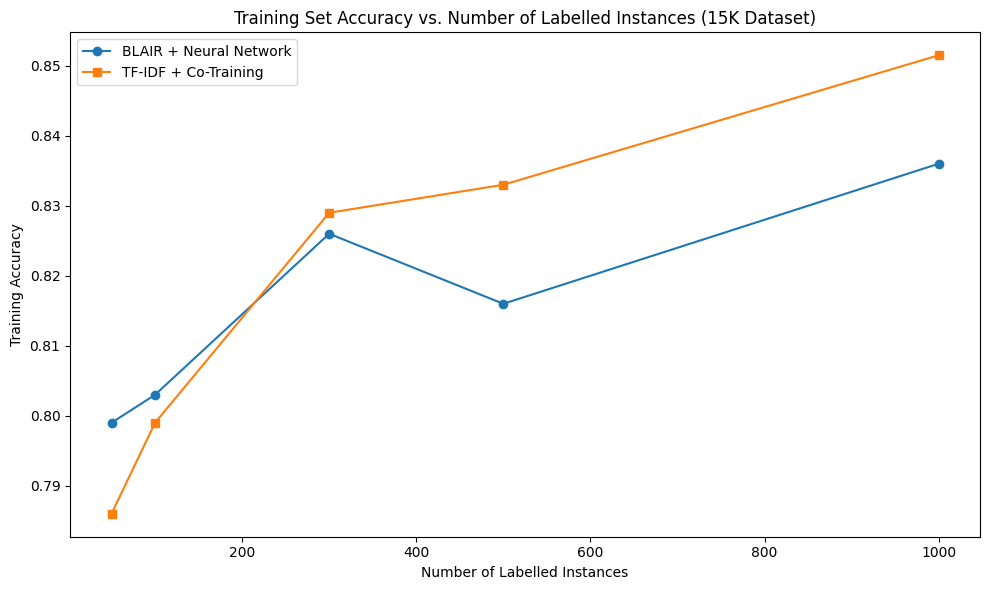

In [ ]:
import matplotlib.pyplot as plt

# Labelled instance sizes
labelled_instances = [50, 100, 300, 500, 1000]

# Example training accuracy for BLAIR + NN on 15K dataset
blair_train_acc = [0.799, 0.803, 0.826, 0.816, 0.836]

# Example training accuracy for TF-IDF + Co-Training on 15K dataset
tfidf_train_acc = [0.786, 0.799, 0.829, 0.833, 0.8515]

# Plotting the training accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(labelled_instances, blair_train_acc, marker='o', label='BLAIR + Neural Network')
plt.plot(labelled_instances, tfidf_train_acc, marker='s', label='TF-IDF + Co-Training')
plt.title("Training Set Accuracy vs. Number of Labelled Instances (15K Dataset)")
plt.xlabel("Number of Labelled Instances")
plt.ylabel("Training Accuracy")
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()